In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
# constants  #
#------------#
HDF5_dir = "C:\MessdatenStoeckach\\"
resampled_dir = r'C:\resampled'
dates = os.listdir(HDF5_dir)
phases = ["0","1","2","3"]

In [3]:
def generateXAxisData():
    return np.linspace(2000, 149950, 2960)

In [5]:
hi = pd.read_pickle(resampled_dir + "\\i" "\\2017-04-10_harmonics10min_i.p")

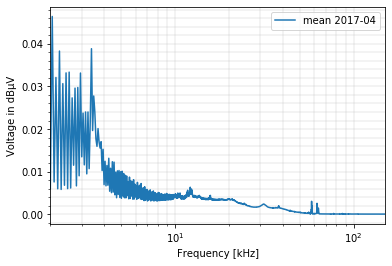

In [7]:
x = generateXAxisData()/1000
y = hi.mean(axis=0)
fig, ax = plt.subplots()
ax.plot(x, y, label ="mean 2017-04")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Voltage in dBµV')
ax.set_xscale('log')
ax.legend()

In [13]:
means = np.empty([0,2960])
for phase in phases:
    print(phase)
    with h5py.File(HDF5_dir + "2017-04-10" + "\\" + "harmonics_phase_" + phase + "_" + "2017-04-10" + ".h5", 'r') as f:
        sh = np.array(f["tenperiodtable"]["harmonics_i"][:,38:], dtype=np.float32)
    means = np.vstack([means, sh.mean(axis=0)])
    del sh

0
1
2
3


In [23]:
resampled_means = hi.mean(axis=0)

In [24]:
resampled_means

0       0.006054
1       0.046417
2       0.007584
3       0.032104
4       0.005981
          ...   
2955    0.000058
2956    0.000052
2957    0.000050
2958    0.000050
2959    0.000049
Length: 2960, dtype: float16

In [26]:
orig_means = np.mean(means, axis=0)

In [28]:
orig_means = pd.DataFrame(orig_means)

In [35]:
deviation = (orig_means - resampled_means)/orig_means

In [39]:
resampled_means = pd.DataFrame(resampled_means)

In [41]:
deviation = (orig_means - resampled_means)/orig_means

In [43]:
deviation *=100

In [44]:
deviation.max()

0    0.441386
dtype: float64

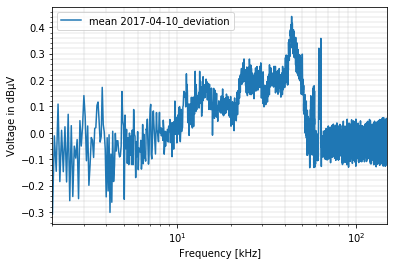

In [46]:
x = generateXAxisData()/1000
y = deviation
fig, ax = plt.subplots()
ax.plot(x, y, label ="mean 2017-04-10_deviation")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Voltage in dBµV')
ax.set_xscale('log')
ax.legend()

In [47]:
hu = pd.read_pickle(resampled_dir + "\\u" "\\2017-04-10_harmonics10min_u.p")

In [ ]:
means = np.empty([0,2960])
for phase in phases:
    print(phase)
    with h5py.File(HDF5_dir + "2017-04-10" + "\\" + "harmonics_phase_" + phase + "_" + "2017-04-10" + ".h5", 'r') as f:
        sh = np.array(f["tenperiodtable"]["harmonics_u"][:,38:], dtype=np.float32)
    means = np.vstack([means, sh.mean(axis=0)])
    del sh

0
1
2


In [ ]:
resampled_means = pd.DataFrame(hu.mean(axis=0))
orig_means = pd.DataFrame(np.mean(means, axis=0))